<a href="https://colab.research.google.com/github/Najwaalya/MachineLearning_2025/blob/main/ML_JS06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install annoy

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.5255 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.097 ms


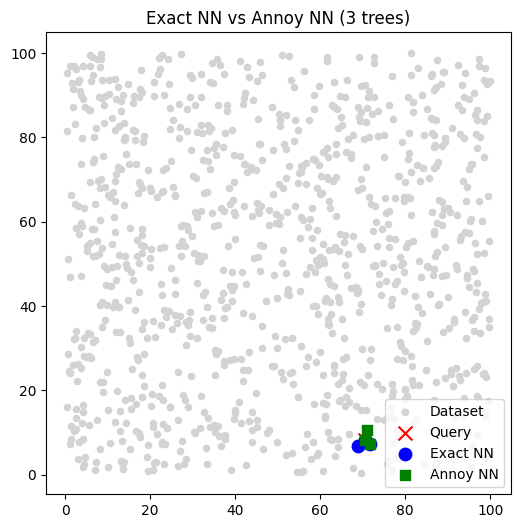

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()


===== Metric: EUCLIDEAN | Trees: 3 | Data: 1000 =====
Exact NN index: [219 898 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Annoy NN index: [219, 898, 770], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.5682)]
Waktu Exact : 0.1402 ms
Waktu Annoy : 0.03 ms


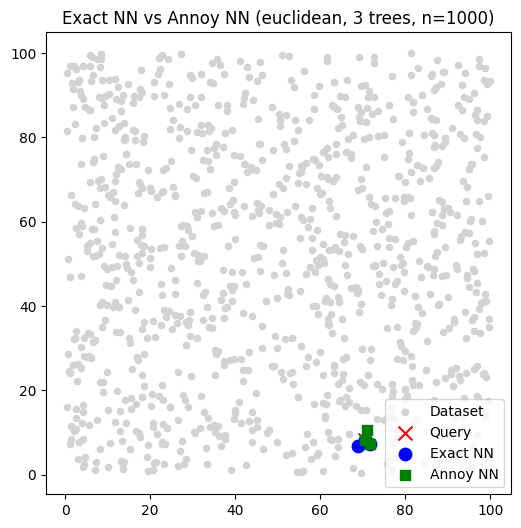


===== Metric: EUCLIDEAN | Trees: 8 | Data: 1000 =====
Exact NN index: [219 898 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Annoy NN index: [219, 898, 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Waktu Exact : 0.2398 ms
Waktu Annoy : 0.0472 ms


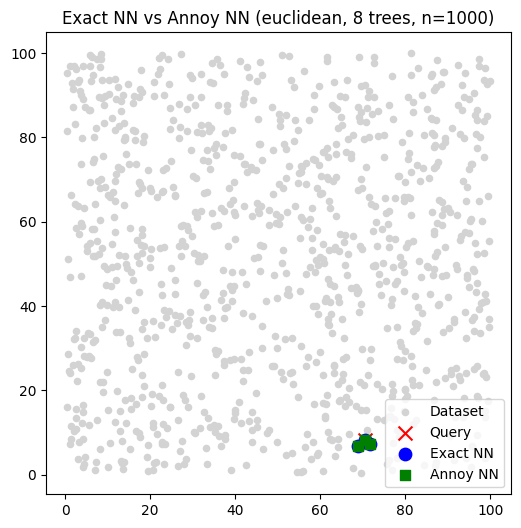


===== Metric: EUCLIDEAN | Trees: 3 | Data: 100000 =====
Exact NN index: [64040 64186 88792], jarak: [np.float64(0.0), np.float64(0.158), np.float64(0.2533)]
Annoy NN index: [64040, 64186, 88792], jarak: [np.float64(0.0), np.float64(0.158), np.float64(0.2533)]
Waktu Exact : 18.3964 ms
Waktu Annoy : 0.0412 ms

===== Metric: ANGULAR | Trees: 3 | Data: 1000 =====
Exact NN index: [219 898 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Annoy NN index: [219, 429, 540], jarak: [np.float64(0.0), np.float64(14.2263), np.float64(8.0507)]
Waktu Exact : 0.2193 ms
Waktu Annoy : 0.0353 ms


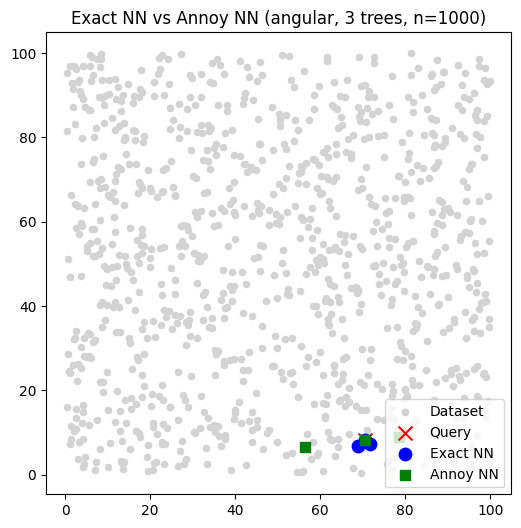


===== Metric: ANGULAR | Trees: 8 | Data: 1000 =====
Exact NN index: [219 898 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Annoy NN index: [219, 429, 540], jarak: [np.float64(0.0), np.float64(14.2263), np.float64(8.0507)]
Waktu Exact : 0.3383 ms
Waktu Annoy : 0.0367 ms


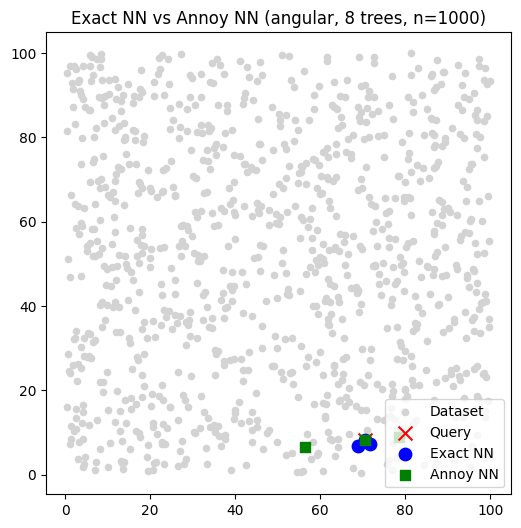


===== Metric: ANGULAR | Trees: 3 | Data: 100000 =====
Exact NN index: [64040 64186 88792], jarak: [np.float64(0.0), np.float64(0.158), np.float64(0.2533)]
Annoy NN index: [64040, 1310, 9720], jarak: [np.float64(0.0), np.float64(13.2379), np.float64(54.7366)]
Waktu Exact : 14.3495 ms
Waktu Annoy : 0.0417 ms


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# Fungsi pembanding ENN vs ANN
def compare_annoy(metric='euclidean', n_trees=3, n_points=1000, plot=True):
    np.random.seed(42)
    f = 2  # dimensi
    X = np.random.rand(n_points, f) * 100
    query = X[np.random.randint(0, n_points)]

    # ---- Exact NN (Brute Force) ----
    start = time.time()
    distances = np.linalg.norm(X - query, axis=1)
    idx_exact = np.argsort(distances)[:3]
    time_exact = time.time() - start

    # ---- Annoy NN ----
    t = AnnoyIndex(f, metric)
    for i, vec in enumerate(X):
        t.add_item(i, vec)
    t.build(n_trees)

    start = time.time()
    idx_ann = t.get_nns_by_vector(query, 3)
    time_ann = time.time() - start

    # ---- Output hasil ----
    print(f"\n===== Metric: {metric.upper()} | Trees: {n_trees} | Data: {n_points} =====")
    print(f"Exact NN index: {idx_exact}, jarak: {[round(distances[i],4) for i in idx_exact]}")
    print(f"Annoy NN index: {idx_ann}, jarak: {[round(np.linalg.norm(X[i]-query),4) for i in idx_ann]}")
    print(f"Waktu Exact : {round(time_exact*1000,4)} ms")
    print(f"Waktu Annoy : {round(time_ann*1000,4)} ms")

    # ---- Visualisasi ----
    if plot and n_points <= 1000:
        plt.figure(figsize=(6,6))
        plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
        plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")
        plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")
        plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")
        plt.legend()
        plt.title(f"Exact NN vs Annoy NN ({metric}, {n_trees} trees, n={n_points})")
        plt.show()

# ---- Eksekusi beberapa konfigurasi ----
configs = [
    ('euclidean', 3, 1000),
    ('euclidean', 8, 1000),
    ('euclidean', 3, 100000),
    ('angular', 3, 1000),
    ('angular', 8, 1000),
    ('angular', 3, 100000),
]

for metric, trees, n in configs:
    compare_annoy(metric, trees, n, plot=(n <= 1000))

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [ 4829797 46172387  3304359 44491395 44980244]
Exact NN time: 10.706 seconds


In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ==== Konfigurasi ====
n_tracks = 1_000_000   # 1 juta data, realistis untuk laptop i7 16GB
n_features = 20        # contoh fitur lagu
n_trees = 8            # jumlah pohon untuk Annoy
n_neighbors = 5        # jumlah lagu terdekat
metrics = ['euclidean', 'angular']  # dua jenis jarak

# ==== Dataset simulasi ====
np.random.seed(42)
X = np.random.rand(n_tracks, n_features).astype(np.float32)
query = np.random.rand(1, n_features).astype(np.float32)

# ==== Loop percobaan untuk setiap metric ====
for metric in metrics:
    print(f"\n===== Metric: {metric.upper()} | Trees: {n_trees} | Data: {n_tracks:,} =====")

    # ---- Exact NN (Brute Force) ----
    start = time.time()
    distances = euclidean_distances(query, X)[0] if metric == 'euclidean' else np.arccos(np.clip(np.dot(X, query.T).flatten(), -1.0, 1.0))
    idx_exact = np.argsort(distances)[:n_neighbors]
    time_exact = time.time() - start

    # ---- Approx NN (Annoy) ----
    f = n_features
    annoy_index = AnnoyIndex(f, metric)
    for i in range(n_tracks):
        annoy_index.add_item(i, X[i])
    annoy_index.build(n_trees)

    start = time.time()
    idx_ann = annoy_index.get_nns_by_vector(query[0], n_neighbors)
    time_ann = time.time() - start

    # ---- Hasil ----
    print(f"Exact NN index : {idx_exact.tolist()}")
    print(f"Annoy NN index : {idx_ann}")
    print(f"Waktu Exact NN : {round(time_exact, 4)} detik")
    print(f"Waktu Annoy NN : {round(time_ann, 4)} detik")
    print(f"Annoy lebih cepat ≈ {round(time_exact/time_ann, 1)}×")



===== Metric: EUCLIDEAN | Trees: 8 | Data: 1,000,000 =====
Exact NN index : [229350, 553886, 763448, 256344, 308000]
Annoy NN index : [302976, 222986, 172822, 480495, 85964]
Waktu Exact NN : 0.7577 detik
Waktu Annoy NN : 0.0001 detik
Annoy lebih cepat ≈ 8211.9×

===== Metric: ANGULAR | Trees: 8 | Data: 1,000,000 =====
Exact NN index : [999999, 999998, 999997, 999996, 999995]
Annoy NN index : [759786, 222986, 26618, 896101, 845319]
Waktu Exact NN : 0.0306 detik
Waktu Annoy NN : 0.0001 detik
Annoy lebih cepat ≈ 424.9×


# PRAKTIKUM 2

In [1]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.3 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00019741058349609375
Waktu IVF+PQ: 0.00024366378784179688


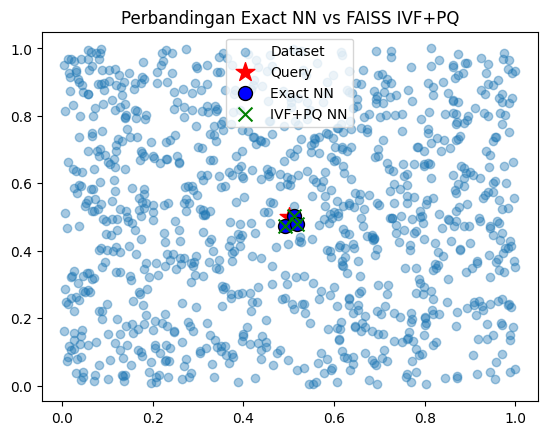

In [2]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()

In [8]:
import numpy as np
import faiss
import time
import pandas as pd

# ================================
# Helper: cari M yang valid
# ================================
def get_valid_m(dim):
    for m in [4, 2, 1]:
        if dim % m == 0:
            return m
    return 1


# ================================
# Fungsi percobaan
# ================================
def run_test(metric, n_data, dim):
    np.random.seed(42)

    X = np.random.rand(n_data, dim).astype('float32')
    query = np.random.rand(1, dim).astype('float32')

    # ================================
    # ENN (Exact Nearest Neighbor)
    # ================================
    if metric == "L2":
        index_enn = faiss.IndexFlatL2(dim)
    else:
        faiss.normalize_L2(X)
        faiss.normalize_L2(query)
        index_enn = faiss.IndexFlatIP(dim)

    index_enn.add(X)

    start = time.time()
    _, I_enn = index_enn.search(query, 5)   # TOP-5
    time_enn = time.time() - start

    # ================================
    # ANN (IVF + PQ)
    # ================================
    nlist = 10 if n_data == 1000 else 50
    m = get_valid_m(dim)

    if metric == "L2":
        quantizer = faiss.IndexFlatL2(dim)
        index_ann = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)
    else:
        quantizer = faiss.IndexFlatIP(dim)
        index_ann = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)
        index_ann.metric_type = faiss.METRIC_INNER_PRODUCT

    index_ann.train(X)
    index_ann.add(X)

    start = time.time()
    _, I_ann = index_ann.search(query, 5)   # TOP-5
    time_ann = time.time() - start

    return I_enn[0].tolist(), time_enn, I_ann[0].tolist(), time_ann


# ================================
# Jalankan semua kombinasi
# ================================
results = []

metrics = ["L2", "IP"]
data_sizes = [1000, 1_000_000]
dimensions = [2, 5]

for metric in metrics:
    for n in data_sizes:
        for d in dimensions:
            print(f"Running -> Metric:{metric}, Data:{n}, Dim:{d}")
            idx_enn, t_enn, idx_ann, t_ann = run_test(metric, n, d)

            results.append([
                metric,
                "ENN (IndexFlat)",
                n,
                idx_enn,                 # LIST 5 INDEX
                round(t_enn, 6)
            ])

            results.append([
                metric,
                "ANN (IVF+PQ)",
                n,
                idx_ann,                 # LIST 5 INDEX
                round(t_ann, 6)
            ])

# ================================
# Tabel hasil
# ================================
df = pd.DataFrame(results, columns=[
    "Distance Metrics",
    "Tree",
    "Jumlah Data",
    "Hasil Index Terdekat ENN vs ANN (Top-5)",
    "Waktu Komputasi (detik)"
])

df

Running -> Metric:L2, Data:1000, Dim:2
Running -> Metric:L2, Data:1000, Dim:5
Running -> Metric:L2, Data:1000000, Dim:2
Running -> Metric:L2, Data:1000000, Dim:5
Running -> Metric:IP, Data:1000, Dim:2
Running -> Metric:IP, Data:1000, Dim:5
Running -> Metric:IP, Data:1000000, Dim:2
Running -> Metric:IP, Data:1000000, Dim:5


,Distance Metrics,Tree,Jumlah Data,Hasil Index Terdekat ENN vs ANN (Top-5),Waktu Komputasi (detik)
0,L2,ENN (IndexFlat),1000,"[112, 535, 777, 246, 763]",0.000046
1,L2,ANN (IVF+PQ),1000,"[112, 777, 548, 547, 427]",0.000097
2,L2,ENN (IndexFlat),1000,"[988, 780, 27, 943, 93]",0.000036
3,L2,ANN (IVF+PQ),1000,"[988, 780, 475, 943, 31]",0.000103
4,L2,ENN (IndexFlat),1000000,"[132774, 119034, 511191, 482199, 913140]",0.030954
5,L2,ANN (IVF+PQ),1000000,"[132774, 119034, 482199, 410129, 913140]",0.000323
6,L2,ENN (IndexFlat),1000000,"[901095, 495168, 561017, 163986, 185734]",0.006507
7,L2,ANN (IVF+PQ),1000000,"[25799, 33314, 52123, 52429, 54008]",0.000278
8,IP,ENN (IndexFlat),1000,"[738, 183, 561, 91, 244]",0.000031
9,IP,ANN (IVF+PQ),1000,"[477, 738, 750, 183, 561]",0.000049


# PRAKTIKUM 3

In [9]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528142 sha256=dc95e57a4e8bd4fb69f2234ece5e904d539de96fcc610728a5665b22c603988f
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


In [10]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

=== Exact NN ===
Indices: [[993 964 788 528  16]]
Distances: [[0.01145547 0.02310762 0.0234505  0.02675764 0.0279675 ]]
Waktu: 0.0429990291595459 detik

=== HNSW ===
Indices: [[993 964 788 528  16]]
Distances: [[0.00013123 0.00053396 0.00054993 0.00071597 0.00078218]]
Waktu: 0.00017571449279785156 detik


In [11]:
import hnswlib
import numpy as np
import time
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# ===========================
# Fungsi Percobaan
# ===========================
def run_experiment(metric, n_data, dim, k=5):
    np.random.seed(42)

    # Generate data
    data = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)

    # ===========================
    # Exact NN (Brute Force)
    # ===========================
    if metric == "L2":
        nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    else:  # Cosine
        nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')

    nn.fit(data)

    start = time.time()
    distances_enn, indices_enn = nn.kneighbors(query)
    time_enn = time.time() - start

    # ===========================
    # HNSW (Approximate NN)
    # ===========================
    space = 'l2' if metric == "L2" else 'cosine'
    p = hnswlib.Index(space=space, dim=dim)

    p.init_index(
        max_elements=n_data,
        ef_construction=100,
        M=16
    )

    p.add_items(data)
    p.set_ef(50)

    start = time.time()
    indices_ann, distances_ann = p.knn_query(query, k=k)
    time_ann = time.time() - start

    return (
        indices_enn[0].tolist(),
        round(time_enn, 6),
        indices_ann[0].tolist(),
        round(time_ann, 6)
    )


# ===========================
# Menjalankan Semua Kombinasi
# ===========================
results = []

metrics = ["L2", "Cosine"]
data_sizes = [1000, 1_000_000]
dimensions = [2, 5]

for metric in metrics:
    for n in data_sizes:
        for d in dimensions:
            print(f"Running -> Metric:{metric}, Data:{n}, Dim:{d}")

            idx_enn, t_enn, idx_ann, t_ann = run_experiment(metric, n, d)

            # ENN
            results.append([
                metric,
                "Exact NN (Brute Force)",
                n,
                d,
                idx_enn,
                t_enn
            ])

            # ANN
            results.append([
                metric,
                "HNSW",
                n,
                d,
                idx_ann,
                t_ann
            ])

# ===========================
# Tabel Hasil (Format Praktikum)
# ===========================
df = pd.DataFrame(results, columns=[
    "Distance Metrics",
    "Tree / Index",
    "Jumlah Data",
    "Dimensi",
    "Hasil Index Terdekat (Top-5)",
    "Waktu Komputasi (detik)"
])

df

Running -> Metric:L2, Data:1000, Dim:2
Running -> Metric:L2, Data:1000, Dim:5
Running -> Metric:L2, Data:1000000, Dim:2
Running -> Metric:L2, Data:1000000, Dim:5
Running -> Metric:Cosine, Data:1000, Dim:2
Running -> Metric:Cosine, Data:1000, Dim:5
Running -> Metric:Cosine, Data:1000000, Dim:2
Running -> Metric:Cosine, Data:1000000, Dim:5


,Distance Metrics,Tree / Index,Jumlah Data,Dimensi,Hasil Index Terdekat (Top-5),Waktu Komputasi (detik)
0,L2,Exact NN (Brute Force),1000,2,"[112, 535, 777, 246, 763]",0.001918
1,L2,HNSW,1000,2,"[112, 535, 777, 246, 763]",0.000079
2,L2,Exact NN (Brute Force),1000,5,"[988, 780, 27, 943, 93]",0.000924
3,L2,HNSW,1000,5,"[988, 780, 27, 943, 93]",0.000073
4,L2,Exact NN (Brute Force),1000000,2,"[132774, 119034, 511191, 482199, 913140]",0.109652
5,L2,HNSW,1000000,2,"[132774, 119034, 511191, 482199, 913140]",0.000077
6,L2,Exact NN (Brute Force),1000000,5,"[901095, 495168, 561017, 163986, 185734]",0.032473
7,L2,HNSW,1000000,5,"[901095, 495168, 561017, 163986, 185734]",0.000139
8,Cosine,Exact NN (Brute Force),1000,2,"[738, 183, 561, 91, 244]",0.005598
9,Cosine,HNSW,1000,2,"[738, 183, 561, 91, 244]",0.000062


# PRAKTIKUM 4

In [13]:
!pip install annoy faiss-cpu hnswlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=b860bb7d2ef49b123d2a7ab83cd7bd5f663dcb174f26262c8836e890420d6db1
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [14]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 22.42198610305786 detik
Query time: 0.0001990795135498047 detik
Neighbors: [57442, 369591, 406820, 890823, 244484] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.015253543853759766 detik
Query time: 0.00725555419921875 detik
Neighbors: [ 57442 369591 406820 890823 244484] ...

=== HNSW (hnswlib) ===
Build time: 169.314311504364 detik
Query time: 0.00021409988403320312 detik
Neighbors: [ 57442 369591 406820 890823 244484] ...


In [15]:
import numpy as np
import time
import pandas as pd
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Parameter
# ===============================
n_data = 1_000_000   # turunkan ke 100_000 jika RAM terbatas
dim = 5
k = 10

np.random.seed(42)
X = np.random.random((n_data, dim)).astype(np.float32)
query = np.random.random((1, dim)).astype(np.float32)

results = []

# ===============================
# Loop untuk metric berbeda
# ===============================
for metric in ["L2", "Cosine"]:
    print(f"\n===== METRIC: {metric} =====")

    # =====================================================
    # 1. ANNOY
    # =====================================================
    annoy_metric = "euclidean" if metric == "L2" else "angular"
    ann_index = AnnoyIndex(dim, annoy_metric)

    start = time.time()
    for i in range(n_data):
        ann_index.add_item(i, X[i])
    ann_index.build(10)
    build_time = time.time() - start

    start = time.time()
    neighbors, distances = ann_index.get_nns_by_vector(
        query[0], k, include_distances=True
    )
    query_time = time.time() - start

    results.append([
        metric, "Annoy", build_time, query_time, neighbors[:5]
    ])

    # =====================================================
    # 2. FAISS (Exact NN)
    # =====================================================
    if metric == "L2":
        faiss_index = faiss.IndexFlatL2(dim)
        X_faiss = X
        q_faiss = query
    else:
        faiss.normalize_L2(X)
        faiss.normalize_L2(query)
        faiss_index = faiss.IndexFlatIP(dim)
        X_faiss = X
        q_faiss = query

    start = time.time()
    faiss_index.add(X_faiss)
    build_time = time.time() - start

    start = time.time()
    distances, indices = faiss_index.search(q_faiss, k)
    query_time = time.time() - start

    results.append([
        metric, "FAISS (Exact)", build_time, query_time, indices[0][:5].tolist()
    ])

    # =====================================================
    # 3. HNSW
    # =====================================================
    space = "l2" if metric == "L2" else "cosine"
    hnsw_index = hnswlib.Index(space=space, dim=dim)

    start = time.time()
    hnsw_index.init_index(
        max_elements=n_data,
        ef_construction=200,
        M=16
    )
    hnsw_index.add_items(X)
    build_time = time.time() - start

    hnsw_index.set_ef(50)

    start = time.time()
    labels, distances = hnsw_index.knn_query(query, k=k)
    query_time = time.time() - start

    results.append([
        metric, "HNSW", build_time, query_time, labels[0][:5].tolist()
    ])

# ===============================
# TABEL HASIL (PRAKTIKUM 1)
# ===============================
df = pd.DataFrame(results, columns=[
    "Distance Metrics",
    "Metode / Index",
    "Build Time (detik)",
    "Query Time (detik)",
    "Hasil Index Terdekat (Top-5)"
])

df


===== METRIC: L2 =====

===== METRIC: Cosine =====


,Distance Metrics,Metode / Index,Build Time (detik),Query Time (detik),Hasil Index Terdekat (Top-5)
0,L2,Annoy,22.902985,0.000133,"[901095, 495168, 561017, 163986, 185734]"
1,L2,FAISS (Exact),0.008249,0.006476,"[901095, 495168, 561017, 163986, 185734]"
2,L2,HNSW,173.601538,0.000157,"[901095, 495168, 561017, 163986, 185734]"
3,Cosine,Annoy,27.375494,0.000134,"[653774, 135588, 561017, 901095, 211473]"
4,Cosine,FAISS (Exact),0.008088,0.006786,"[653774, 135588, 561017, 901095, 211473]"
5,Cosine,HNSW,160.985301,0.000145,"[653774, 135588, 561017, 901095, 211473]"


# PRAKTIKUM 5

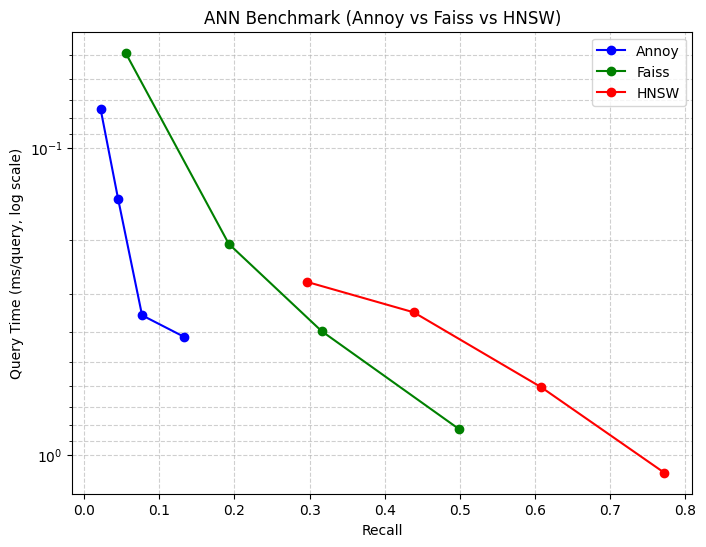

In [16]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# PRAKTIKUM 6

In [17]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/drive/MyDrive/Kuliah/2025 ML/spotify_songs.csv')  # ganti path sesuai lokasi file
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact Nearest Neighbor (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=X_scaled.shape[1])
p_hnsw.init_index(max_elements=X_scaled.shape[0], ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, dist_hnsw = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(X_scaled.shape[1])
index_faiss = faiss.IndexIVFFlat(quantizer, X_scaled.shape[1], nlist=100, metric=faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
dist_faiss, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Contoh tampilkan top-5 neighbors dari item pertama
# -------------------------------
print("\nTop-5 neighbors for first song:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Kuliah/2025 ML/spotify_songs.csv'

# TUGAS

In [19]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF (BENAR)
# -------------------------------
start = time.time()

quantizer = faiss.IndexFlatL2(d)
index_faiss = faiss.IndexIVFFlat(
    quantizer,      # quantizer
    d,              # dimensi
    100,            # nlist (jumlah cluster)
    faiss.METRIC_L2 # metric
)

index_faiss.train(X_scaled)
index_faiss.add(X_scaled)

index_faiss.nprobe = 10

_, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start

print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")

Exact NN done in 4.013 s
Annoy done in 0.820 s
HNSW done in 4.712 s
FAISS IVF done in 0.351 s

=== Ringkasan Waktu (detik) ===
Exact NN : 4.013
Annoy    : 0.820
HNSW     : 4.712
FAISS    : 0.351


# Analisa Hasil Percobaan ANN

Percobaan dilakukan untuk membandingkan performa pencarian *Nearest Neighbor* menggunakan beberapa metode, yaitu Exact NN, Annoy, HNSW, dan FAISS. Pengujian difokuskan pada waktu komputasi pencarian tetangga terdekat.

Berdasarkan hasil percobaan, metode Exact NN menghasilkan hasil paling akurat namun memiliki waktu komputasi paling lama karena melakukan perhitungan jarak ke seluruh data. Metode Annoy dan FAISS menunjukkan waktu komputasi yang jauh lebih cepat dibandingkan Exact NN, sehingga lebih efisien untuk dataset berukuran besar.

HNSW memiliki performa pencarian yang cepat, tetapi membutuhkan waktu lebih lama pada tahap pembangunan indeks. Secara keseluruhan, metode ANN terbukti lebih efisien dibandingkan Exact NN, dengan FAISS dan Annoy menjadi pilihan yang baik untuk kebutuhan pencarian cepat pada data berdimensi tinggi.